# Iris Classification

### From the statement, we could identify that this is a supervised learning problem since the input ie., measurements of the peatals and sepals are given.

### This can be further identified as a classification problem, since we are asked to identify the species of the iris,which are of 3 classes namely setosa,versicolor, or virginica.

### Therefore the possible output can be of 3 classes, hence every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem.

### ***********************************************************************************************************************************

#### The data used for this example is the Iris dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn in the datasets module.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import scipy as sp
import IPython
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
import xgboost as xgb

In [36]:
iris_dataset = load_iris()

In [37]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [39]:
print(iris_dataset['DESCR'][:1100])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [40]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [41]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [42]:
print(iris_dataset['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [43]:
print(iris_dataset['data'].shape)

(150, 4)


In [44]:
print(iris_dataset['data'][0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [45]:
print(iris_dataset['target'].shape)

(150,)


In [46]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Inference

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(iris_dataset['data'],iris_dataset['target'],test_size=0.3,random_state=0)

In [49]:
print(xtrain.shape)
print(ytrain.shape)

(105, 4)
(105,)


In [50]:
print(xtest.shape)
print(ytest.shape)

(45, 4)
(45,)


In [51]:
# Creating a pair plot to inspect and understand the aspects of the data available to us.

In [52]:
iris_dataframe = pd.DataFrame(xtrain,columns=iris_dataset.feature_names)

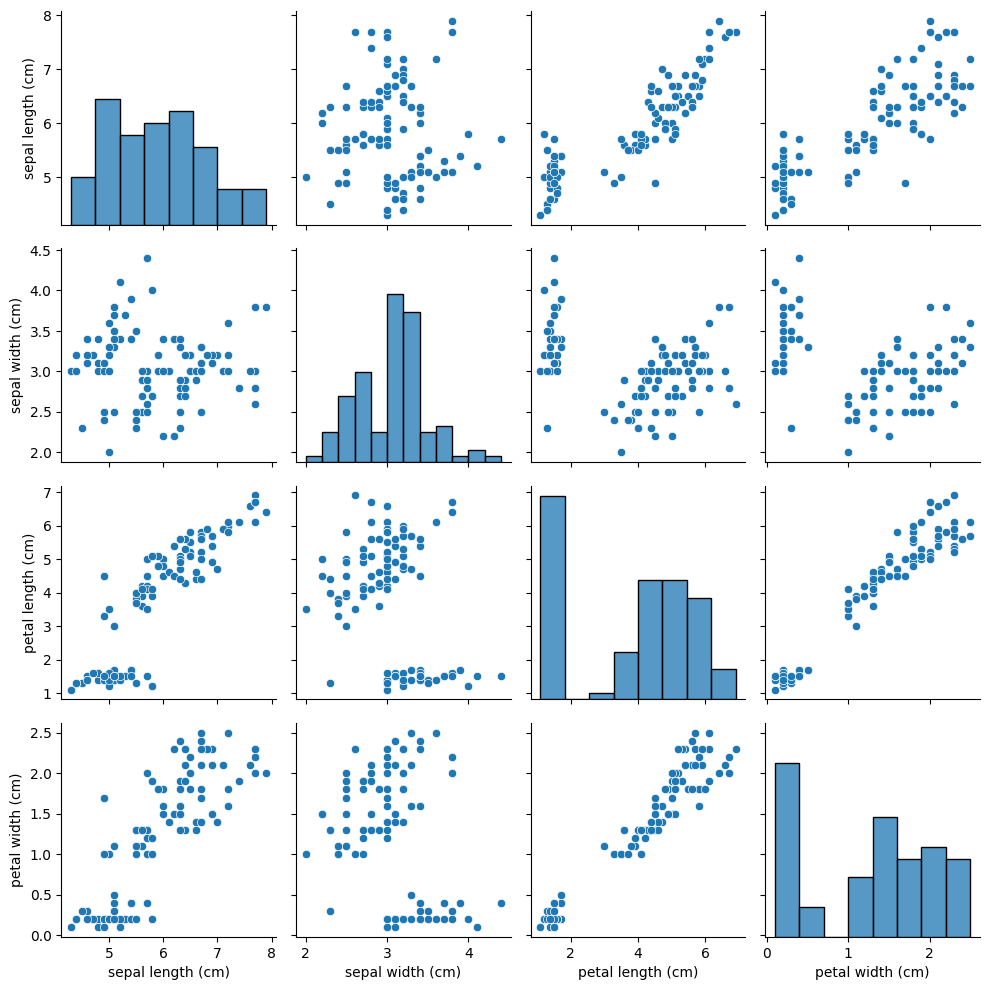

In [53]:
# t=1
# for i in iris_dataframe:
#     for j in iris_dataframe:
#         plt.subplot(4,4,t)
#         if i!=j:
#             sns.scatterplot(x=iris_dataframe[i],y=iris_dataframe[j])
# #             plt.title(f'Box plot of column {i}')
#         else:
#             sns.histplot(iris_dataframe[i])
#         t+=1
# plt.tight_layout()
# plt.show()
sns.pairplot(iris_dataframe)
plt.tight_layout()
plt.show()

# Inference

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. Therefore we can conclude that a machine learning model will be able to learn to distinguish the features.

### Building a KNN model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
model1 = knn.fit(xtrain,ytrain)

### Making Predictions

In [56]:
x_new = np.array([[8,0.9,3,0.8]])
print(x_new.shape)

(1, 4)


In [57]:
pred = model1.predict(x_new)
print("Prediction: {}".format(pred))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][pred]))

Prediction: [1]
Predicted target name: ['versicolor']


### Evaluating the Model

In [58]:
ypred1 = model1.predict(xtrain)
print(f'Test_set predictions: {ypred1}')
print("Predicted target name: {}".format(
       iris_dataset['target_names'][ypred1]))

Test_set predictions: [1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 2 1 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]
Predicted target name: ['versicolor' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'setosa' 'virginica' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 've

In [59]:
print(f'Test set score: {round(knn.score(xtest,ytest),3)}')

Test set score: 0.978


In [60]:
ytrain.shape

(105,)

In [61]:
ypred1.shape

(105,)

# Inference

In [62]:
p1 = precision_score(ytrain,ypred1,average='micro')
f1 = f1_score(ytrain,ypred1,average='micro')
r1 = recall_score(ytrain,ypred1,average='micro')
print('Accuracy Score',accuracy_score(ytrain,ypred1))

Accuracy Score 0.9619047619047619


In [63]:
print(p1)
print(f1)
print(r1)

0.9619047619047619
0.9619047619047619
0.9619047619047619


We can conclude that for this model, the test set accuracy is about 0.97, which means we made
the right prediction for 97% of the irises in the test set.

In [64]:
rf = RandomForestClassifier()
model2 = rf.fit(xtrain,ytrain)
ypred2 =  model2.predict(xtrain)
p2 = precision_score(ytrain,ypred2,average='micro')
f2 = f1_score(ytrain,ypred2,average='micro')
r2 = recall_score(ytrain,ypred2,average='micro')

In [65]:
abc = AdaBoostClassifier()
model3 = abc.fit(xtrain,ytrain)
ypred3 = model3.predict(xtrain)
p3 = precision_score(ytrain,ypred3,average='micro')
f3 = f1_score(ytrain,ypred3,average='micro')
r3 = recall_score(ytrain,ypred3,average='micro')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [66]:
gbc = GradientBoostingClassifier()
model4 = gbc.fit(xtrain,ytrain)
ypred4 = model4.predict(xtrain)
p4 = precision_score(ytrain,ypred4,average='micro')
f4 = f1_score(ytrain,ypred4,average='micro')
r4 = recall_score(ytrain,ypred4,average='micro')

In [67]:
dt = DecisionTreeClassifier()
model5 = dt.fit(xtrain,ytrain)
ypred5 = model5.predict(xtrain)
p5 = precision_score(ytrain,ypred5,average='micro')
f5 = f1_score(ytrain,ypred5,average='micro')
r5 = recall_score(ytrain,ypred5,average='micro')

In [68]:
data = {'Models':['KNN','Random Forest Classifier','AdaBoost Classifier',
                    'Gradient Boosting Classifier','Decision tree Classifier'],
        'P_Score':[p1,p2,p3,p4,p5],
         'F1_Score':[f1,f2,f3,f4,f5],
        'Recall_Score':[r1,r2,r3,r4,r5]}
result = pd.DataFrame(data).sort_values(by = ['P_Score','F1_Score','Recall_Score'],ascending=False)
result

,Models,P_Score,F1_Score,Recall_Score
1,Random Forest Classifier,1.000000,1.000000,1.000000
3,Gradient Boosting Classifier,1.000000,1.000000,1.000000
4,Decision tree Classifier,1.000000,1.000000,1.000000
0,KNN,0.961905,0.961905,0.961905
2,AdaBoost Classifier,0.961905,0.961905,0.961905


In [69]:
from sklearn.metrics import classification_report,accuracy_score
y_test_predict = model1.predict(xtest)

p6 = precision_score(ytest,y_test_predict,average='micro')
f6 = f1_score(ytest,y_test_predict,average='micro')
r6 = recall_score(ytest, y_test_predict,average ='micro')
print('classification report\n',classification_report(ytest,y_test_predict))
print('Accuracy Score',accuracy_score(ytest,y_test_predict))

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy Score 0.9777777777777777


In [70]:
y_test_predict2 = model2.predict(xtest)

p7 = precision_score(ytest, y_test_predict2, average='micro')
f7 = f1_score(ytest, y_test_predict2, average='micro')
r7 = recall_score(ytest, y_test_predict2, average='micro')
print('classification report\n',classification_report(ytest,y_test_predict2))

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [71]:
y_test_predict3 = model3.predict(xtest)

p8 = precision_score(ytest, y_test_predict3, average='micro')
f8 = f1_score(ytest, y_test_predict3, average='micro')
r8 = recall_score(ytest, y_test_predict3, average='micro')
print('classification report\n',classification_report(ytest,y_test_predict3))

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45



In [72]:
y_test_predict4 = model4.predict(xtest)

p9 = precision_score(ytest, y_test_predict4, average='micro')
f9 = f1_score(ytest, y_test_predict4, average='micro')
r9 = recall_score(ytest, y_test_predict4, average='micro')
print('classification report\n',classification_report(ytest,y_test_predict4))

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [73]:
y_test_predict5 = model5.predict(xtest)

p10 = precision_score(ytest, y_test_predict5, average='micro')
f10 = f1_score(ytest, y_test_predict5, average='micro')
r10 = recall_score(ytest, y_test_predict5, average='micro')
print('classification report\n',classification_report(ytest,y_test_predict5))

classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [74]:
data = {
        'Models': ['KNN', 'Random Forest Classifier', 'Adaboost classifier', 'Gradient Boost classifier', 'Decision Tree Classifier'],
        'precision': [p6, p7, p8, p9, p10],
        'recall': [r6, r7, r8, r9, r10],
        'f1': [f6, f7, f8, f9, f10]
        }

result2 = pd.DataFrame(data).sort_values(by=['precision', 'recall', 'f1'], ascending=False)
result2

,Models,precision,recall,f1
0,KNN,0.977778,0.977778,0.977778
1,Random Forest Classifier,0.977778,0.977778,0.977778
3,Gradient Boost classifier,0.977778,0.977778,0.977778
4,Decision Tree Classifier,0.977778,0.977778,0.977778
2,Adaboost classifier,0.911111,0.911111,0.911111


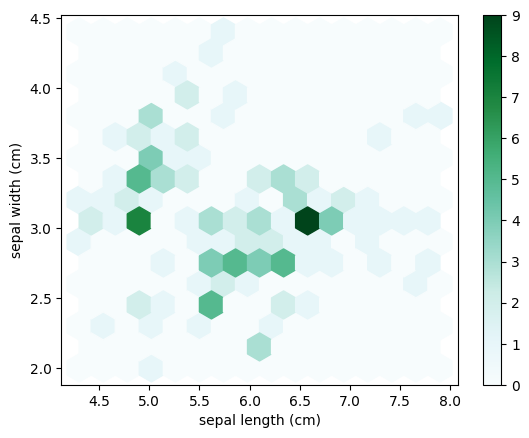

In [75]:
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df.plot(kind='hexbin',x='sepal length (cm)',y='sepal width (cm)',gridsize=15)
plt.show()